In [1]:
""" Simple linear regression example in TensorFlow
This program tries to predict the number of thefts from 
the number of fire in the city of Chicago
Author: Chip Huyen
Prepared for the class CS 20SI: "TensorFlow for Deep Learning Research"
cs20si.stanford.edu
"""
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

#import utils

DATA_FILE = 'data/fire_theft.xls'

# Phase 1: Assemble the graph
# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override='utf-8')
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

ImportError: Traceback (most recent call last):
  File "C:\Anaconda2\envs\tf\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 18, in swig_import_helper
    return importlib.import_module(mname)
  File "C:\Anaconda2\envs\tf\lib\importlib\__init__.py", line 109, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 2254, in _gcd_import
  File "<frozen importlib._bootstrap>", line 2237, in _find_and_load
  File "<frozen importlib._bootstrap>", line 2226, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 1191, in _load_unlocked
  File "<frozen importlib._bootstrap>", line 1161, in _load_backward_compatible
  File "<frozen importlib._bootstrap>", line 539, in _check_name_wrapper
  File "<frozen importlib._bootstrap>", line 1715, in load_module
  File "<frozen importlib._bootstrap>", line 321, in _call_with_frames_removed
ImportError: DLL load failed: The specified module could not be found.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Anaconda2\envs\tf\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 41, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Anaconda2\envs\tf\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 21, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\Anaconda2\envs\tf\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 20, in swig_import_helper
    return importlib.import_module('_pywrap_tensorflow_internal')
  File "C:\Anaconda2\envs\tf\lib\importlib\__init__.py", line 109, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
ImportError: No module named '_pywrap_tensorflow_internal'


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/install_sources#common_installation_problems

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [ ]:
# Step 2: create placeholders for input X (number of fire) and label Y (number of theft)
# Both have the type float32
X = tf.placeholder(tf.float32,name="X",shape=None)
Y = tf.placeholder(tf.float32,name="Y",shape=None)

In [ ]:
# Step 3: create weight and bias, initialized to 0
# name your variables w and b
w = tf.Variable(0.0, name="weights")
b = tf.Variable(0.0, name="bias")

In [40]:
# Step 4: predict Y (number of theft) from the number of fire
# name your variable Y_predicted
Y_predicted = X*w + b

In [41]:
# Step 5: use the square error as the loss function
# name your variable loss
loss = tf.square(X-Y_predicted,name="loss") 

In [42]:
# Step 6: using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)
    for i in range(50): # run 100 epochs
        total_loss = 0
        for x, y in data:
            _, l = sess.run([optimizer,loss], feed_dict={X:x,Y:y})
            total_loss += l
        print("Epoch {0}: {1}".format(i, total_loss/n_samples))
    writer.close()
    w,b = sess.run([w,b])

Epoch 0: 13.678699552997863
Epoch 1: 0.0025357624607576803
Epoch 2: 0.0024027384459345954
Epoch 3: 0.0022768415293241908
Epoch 4: 0.0021574617391620235
Epoch 5: 0.002044307636402837
Epoch 6: 0.0019370349102592584
Epoch 7: 0.0018354369579659153
Epoch 8: 0.0017392662961399417
Epoch 9: 0.0016479678658383602
Epoch 10: 0.0015615550408992498
Epoch 11: 0.0014796343103149585
Epoch 12: 0.0014021082841368514
Epoch 13: 0.0013285730358239519
Epoch 14: 0.0012589018485327653
Epoch 15: 0.0011928588137379847
Epoch 16: 0.0011303704032105174
Epoch 17: 0.001071113646633291
Epoch 18: 0.0010148387045124504
Epoch 19: 0.0009616048664827845
Epoch 20: 0.0009112604609851717
Epoch 21: 0.0008633913229936124
Epoch 22: 0.0008181976318372195
Epoch 23: 0.0007752020967581345
Epoch 24: 0.0007346690730671634
Epoch 25: 0.0006961110250250343
Epoch 26: 0.000659626545257197
Epoch 27: 0.0006250092626595731
Epoch 28: 0.0005922461336705878
Epoch 29: 0.0005611529210606628
Epoch 30: 0.0005317500686465965
Epoch 31: 0.000503878204

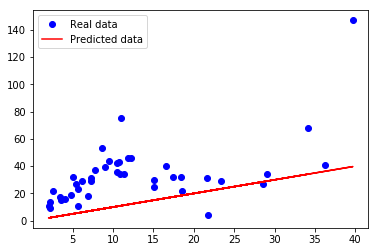

In [43]:
#plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w + b, 'r', label='Predicted data')
plt.legend()
plt.show()